In [1]:
#CELL-NO: 1
## Tutorial from GeekForGeeks
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.datasets import fetch_california_housing

In [39]:
#CELL-NO: 2
import warnings
#suppress warnings
warnings.filterwarnings('ignore')

In [3]:
#CELL-NO: 3
california_housing = fetch_california_housing()

X = pd.DataFrame(california_housing.data, columns=california_housing.feature_names)
y = pd.Series(california_housing.target)

In [7]:
#CELL-NO: 4
X.shape

(20640, 8)

In [9]:
#CELL-NO: 5
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


In [11]:
#CELL-NO: 6
y.shape

(20640,)

In [13]:
#CELL-NO: 7
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 20640 entries, 0 to 20639
Series name: None
Non-Null Count  Dtype  
--------------  -----  
20640 non-null  float64
dtypes: float64(1)
memory usage: 161.4 KB


In [15]:
#CELL-NO: 8
print(california_housing.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [17]:
#CELL-NO: 9
print(california_housing.target)

[4.526 3.585 3.521 ... 0.923 0.847 0.894]


In [21]:
#CELL-NO: 10
##Select features for evaluation
X = X[['MedInc', 'AveRooms']]

In [33]:
#CELL-NO: 11
X.shape

(20640, 2)

In [35]:
#CELL-NO: 12
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   MedInc    20640 non-null  float64
 1   AveRooms  20640 non-null  float64
dtypes: float64(2)
memory usage: 322.6 KB


In [25]:
#CELL-NO: 13
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [27]:
#CELL-NO: 14
#Initialize and train the model
model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [29]:
#CELL-NO: 15
##Making Predictions
y_pred = model.predict(X_test)

In [31]:
#CELL-NO: 16
y_pred

array([1.16230214, 1.49913482, 1.95573059, ..., 4.33311942, 1.59978552,
       1.98667198])

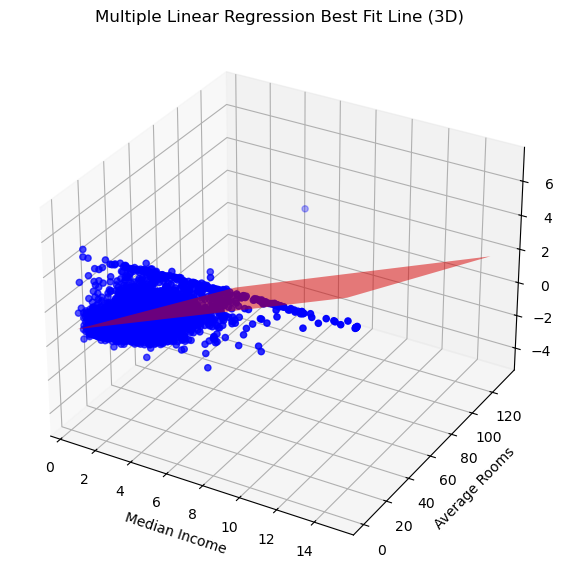

In [41]:
#CELL-NO: 17
##Visualizing Best Fit Line in 3D
##Blue points represent actual house prices based on MedInc and AveRooms
##Red points represent the best-fit plane predicted by the model

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_test['MedInc'], X_test['AveRooms'],
           y_test, color='blue', label='Actual Data')

x1_range = np.linspace(X_test['MedInc'].min(), X_test['MedInc'].max(), 100)
x2_range = np.linspace(X_test['AveRooms'].min(), X_test['AveRooms'].max(), 100)
x1, x2 = np.meshgrid(x1_range, x2_range)

z = model.predict(np.c_[x1.ravel(), x2.ravel()]).reshape(x1.shape)

ax.plot_surface(x1, x2, z, color='red', alpha=0.5, rstride=100, cstride=100)

ax.set_xlabel('Median Income')
ax.set_ylabel('Average Rooms')
ax.set_zlabel('House Price')
ax.set_title('Multiple Linear Regression Best Fit Line (3D)')

plt.show()

In [ ]:
#CELL-NO: 18
